In [28]:
from IPython.display import FileLink

In [29]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [4]:
%%R
library(reshape2)
library(phyloseq)
library(ggplot2)
library(plyr); library(dplyr)
library(RColorBrewer)


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [5]:
%%R
workDir = '/home/chantal/Chazy/data/'
figDir = '/home/chantal/Chazy/Bulk/ITS/data/figs/'

physeqDir = '/home/chantal/Chazy/data/phyloseq/ITS/'
physeqBulk = 'bulk-core'


nprocs = 20

In [58]:
%%R

F = file.path(physeqDir, physeqBulk)

physeq.Bulk = readRDS(F)
physeq.Bulk.m = physeq.Bulk %>% sample_data
physeq.Bulk = prune_samples((physeq.Bulk.m$Land_Management != "PAS"),
                           physeq.Bulk)
physeq.Bulk = physeq.Bulk %>% filter_taxa(function(x) sum(x) > 0, TRUE) 
    
physeq.Bulk = physeq.Bulk %>% transform_sample_counts(function(x) x/sum(x))

#physeq.Bulk.Sparsity = filter_taxa(physeq.Bulk, function(x) sum(x > 0) > (0.25 * length(x)), TRUE)

physeq.Bulk

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2093 taxa and 176 samples ]
sample_data() Sample Data:       [ 176 samples by 24 sample variables ]
tax_table()   Taxonomy Table:    [ 2093 taxa by 7 taxonomic ranks ]


In [59]:
%%R
mdf = psmelt(physeq.Bulk)
head(mdf)

           OTU          Sample Abundance     Full.sample Fraction PrimerF
121783  OTU.26 Sept.NTH.1.2015 0.8313000 Sept.NTH.1.2015       NA  nBITSf
364757  OTU.96       Oct.NTH.3 0.5951705       Oct.NTH.3       NA  nBITSf
147817   OTU.3       Nov.PTR.2 0.5717046       Nov.PTR.2       NA  nBITSf
167460  OTU.34    July14.PTR.4 0.5666000    July14.PTR.4       NA  nBITSf
85286  OTU.201  Oct.PTH.1.2015 0.4819194  Oct.PTH.1.2015       NA  nBITSf
6681   OTU.107       Oct.PTR.3 0.4510679       Oct.PTR.3       NA  nBITSf
       PrimerR Barcode Rev.index Fwd.index Treatment Day Pool     Experiment
121783   58A2r     136  gatctacg  gacaccgt       NTH  NA    5 Chazy.ITS.Bulk
364757   58A2r     106  cgaagtat  actatctg       NTH  NA    4 Chazy.ITS.Bulk
147817   58A2r     134  gatctacg  cgtgagtg       PTR  NA    4 Chazy.ITS.Bulk
167460   58A2r      70  actacgac  cgtgagtg       PTR  NA    4 Chazy.ITS.Bulk
85286    58A2r     155  atagtacc  tagcgagt       PTH  NA    5 Chazy.ITS.Bulk
6681     58A2r     1

In [60]:
%%R
Class.fig = mdf %>% group_by(OTU, Treatment) %>% summarise(meanAb = mean(Abundance), sdAb = sd(Abundance))

In [61]:
%%R
head(Class.fig)

Source: local data frame [6 x 4]
Groups: OTU [2]

       OTU Treatment       meanAb         sdAb
     (chr)    (fctr)        (dbl)        (dbl)
1  OTU.100       NTH 1.324433e-05 8.785296e-05
2  OTU.100       NTR 9.418679e-06 6.247645e-05
3  OTU.100       PTH 3.180836e-04 1.338020e-03
4  OTU.100       PTR 8.650521e-04 1.930513e-03
5 OTU.1001       NTH 2.522356e-04 5.041954e-04
6 OTU.1001       NTR 7.076085e-04 2.530329e-03


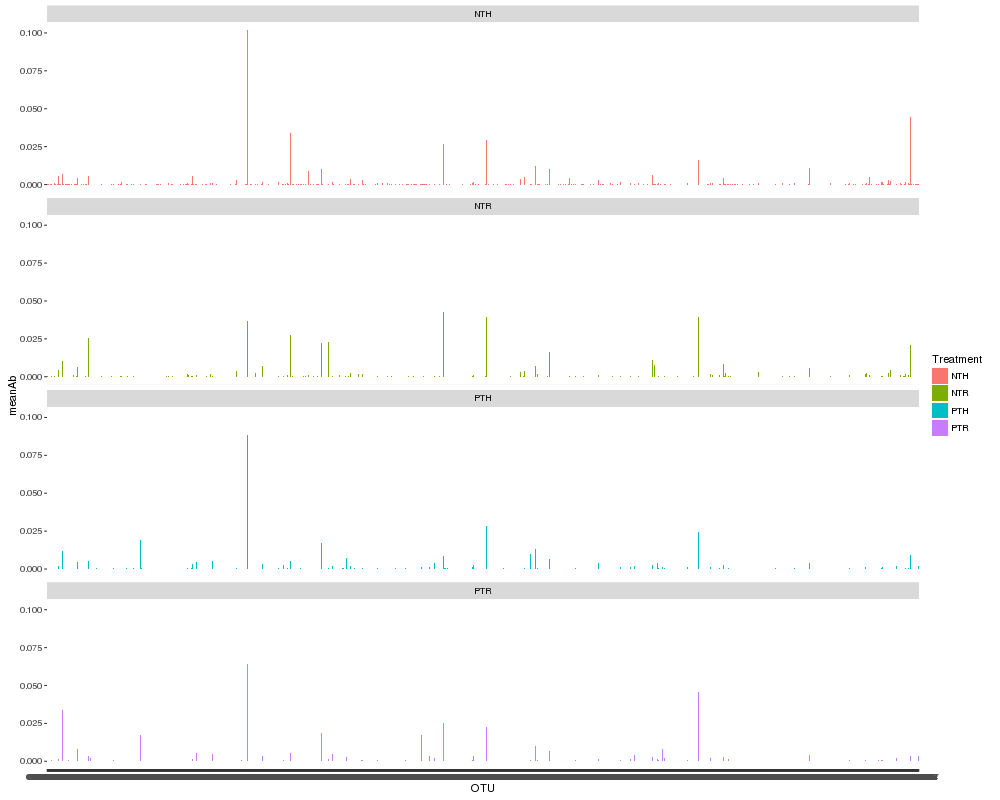

In [62]:
%%R -w 1000 -h 800
ggplot(Class.fig, aes(OTU, meanAb)) + geom_bar(stat = 'identity', aes(fill = Treatment)) + facet_wrap(~Treatment, ncol = 1)

In [63]:
%%R 
mdf %>% summarise(seq = sum(Abundance))

  seq
1 176


In [64]:
%%R
test = mdf %>% group_by(Sample) %>% summarise(sampleseq = sum(Abundance))
summary(test$sampleseq)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 


In [65]:
%%R
unique(mdf$Sample_Date)

 [1] 9/23/15  10/29/14 11/26/14 7/10/14  10/27/15 4/30/15  6/17/15  7/16/15 
 [9] 8/13/15  11/25/15 9/24/14 
11 Levels: 10/27/15 10/29/14 11/25/15 11/26/14 4/30/15 6/17/15 ... 9/24/14


In [103]:
%%R
df.l2fc = read.table("data/l2fc_Moist_allSamples.txt", sep = '\t', header = TRUE)

In [67]:
%%R
mdf.byday = ddply(mdf, .(Sample_Date, OTU), summarize, mean_day_abundance = mean(Abundance))
mdf.byday = mdf.byday[order( mdf.byday$Sample_Date, -mdf.byday$mean_day_abundance),]
mdf.Nov = subset(mdf.byday, Sample_Date == '11/26/14')
mdf.Nov$Rank = rank(-mdf.Nov$mean_day_abundance, ties.method = "random")
mdf.byday.Nov = join(mdf.byday, mdf.Nov[,c("OTU","Rank")], by = "OTU")

In [104]:
%%R
head(df.l2fc)

  Land_Management sparsity_threshold      OTU log2FoldChange      lfcSE
1             NTH               0.45  OTU.133   -0.009693962 0.06031610
2             NTH               0.45   OTU.45   -0.020811900 0.06469306
3             NTH               0.45 OTU.2583   -0.227565465 0.10886660
4             NTH               0.45  OTU.628   -0.298682080 0.10469286
5             NTH               0.45  OTU.139    0.144634354 0.08922624
6             NTH               0.45  OTU.169    0.069291741 0.10572347
        padj    Rank1            Rank2              Rank3           Rank4
1 0.91453940 k__Fungi    p__Ascomycota c__Sordariomycetes  o__Hypocreales
2 0.88300842 k__Fungi p__Basidiomycota  c__Agaricomycetes  o__Polyporales
3 0.14104182 k__Fungi p__Basidiomycota  c__Agaricomycetes   o__Agaricales
4 0.03110968 k__Fungi    p__Ascomycota c__Dothideomycetes o__Pleosporales
5 0.29111069 k__Fungi p__Basidiomycota  c__Agaricomycetes   o__Agaricales
6 0.74246480 k__Fungi    p__Ascomycota c__Dothideomy

In [105]:
%%R
FDR = 0.10
df.l2fc.rspndr = df.l2fc %>%
    filter(padj2 <= 0.10)   

In [106]:
%%R
length(df.l2fc.rspndr$OTU)

[1] 21


In [107]:
%%R
d = left_join(df.l2fc.rspndr, mdf.byday.Nov) 

In [108]:
%%R
head(d)

  Land_Management sparsity_threshold     OTU log2FoldChange      lfcSE
1             NTH               0.45 OTU.134      -0.265424 0.06469197
2             NTH               0.45 OTU.134      -0.265424 0.06469197
3             NTH               0.45 OTU.134      -0.265424 0.06469197
4             NTH               0.45 OTU.134      -0.265424 0.06469197
5             NTH               0.45 OTU.134      -0.265424 0.06469197
6             NTH               0.45 OTU.134      -0.265424 0.06469197
          padj    Rank1         Rank2             Rank3              Rank4
1 0.0008628047 k__Fungi p__Ascomycota c__Eurotiomycetes o__Chaetothyriales
2 0.0008628047 k__Fungi p__Ascomycota c__Eurotiomycetes o__Chaetothyriales
3 0.0008628047 k__Fungi p__Ascomycota c__Eurotiomycetes o__Chaetothyriales
4 0.0008628047 k__Fungi p__Ascomycota c__Eurotiomycetes o__Chaetothyriales
5 0.0008628047 k__Fungi p__Ascomycota c__Eurotiomycetes o__Chaetothyriales
6 0.0008628047 k__Fungi p__Ascomycota c__Eurotiomycet

In [109]:
%%R
#mdf.byday.ranked = filter(mdf.byday.ranked, Sample_Date == '7/10/14' )

NULL


In [1]:
%%R -w 1000 -h 800
getPalette = colorRampPalette(brewer.pal(5, "Dark2"))

mdf.byday.Nov$Sample_Date = factor(mdf.byday.Nov$Sample_Date, 
                                        levels = c('7/10/14', '9/24/14', '10/29/14', '11/26/14', 
                                                  '4/30/15', '6/17/15', '7/16/15', '8/13/15', 
                                                  '9/23/15', '10/27/15', '11/25/15'))

d$Sample_Date = factor(d$Sample_Date, levels = c('7/10/14', '9/24/14', '10/29/14', '11/26/14', 
                                                  '4/30/15', '6/17/15', '7/16/15', '8/13/15', 
                                                  '9/23/15', '10/27/15', '11/25/15'))


#p = p + geom_vline(data = d.RNA, aes(xintercept = Rank), color = "#377eb8", alpha = 0.25, size = 1)
#p = p + geom_vline(data = d.DNA, aes(xintercept = Rank), color = "#4daf4a", alpha = 0.25, size = 1)

p = ggplot(data = mdf.byday.Nov, aes(x = Rank, y = mean_day_abundance))# + 
           # geom_line(alpha = 0.5, size = 0.5) 

p = p + geom_point(data = d, aes(fill = Sample_Date, color = Sample_Date, shape = Moisture, alpha = 0.6),
                                 size = 3)
#p = p + geom_rug(data = d.DNA, color = "blue", sides = "t", size = 1.25)

p = p + geom_line(data = subset(mdf.byday.Nov, Sample_Date == '11/26/14'), 
                  size = 1)

p = p +  scale_shape_manual(values = c(16,17))


p = p + scale_y_log10()

p = p + scale_x_log10()

p = p  + theme(text = element_text(size=16))

p = p + labs(x = "Nov 2014 Rank", y = "Relative Abundance", size = "Sample Date") +
       guides(fill= guide_legend(override.aes = list(size=3))) + facet_wrap(~Land_Management) +
        guides(alpha = FALSE)


p


ERROR: Cell magic `%%R` not found.


In [139]:
%%R
d %>% group_by(OTU, Rank2, Rank3, Rank6, Rank7) %>% 
    mutate(minab = min(mean_day_abundance)) %>% filter(Sample_Date %in% c('11/26/14', '4/30/15')) %>% 
    group_by(OTU, Rank2, Rank3, Rank6,Sample_Date, Rank7) %>% mutate(ratio = (mean_day_abundance/minab)) %>% ungroup()%>%
    select(OTU, Rank2, Rank6, Sample_Date, ratio, Rank7) %>% as.data.frame


         OTU            Rank2            Rank6 Sample_Date       ratio
1    OTU.134    p__Ascomycota     g__Exophiala    11/26/14    2.414052
2    OTU.134    p__Ascomycota     g__Exophiala     4/30/15    1.623589
3     OTU.60    p__Ascomycota  g__unidentified    11/26/14    6.546472
4     OTU.60    p__Ascomycota  g__unidentified     4/30/15    1.286353
5    OTU.114    p__Ascomycota   g__Trichoderma    11/26/14    2.002984
6    OTU.114    p__Ascomycota   g__Trichoderma     4/30/15    5.520924
7    OTU.197    p__Ascomycota  g__unidentified    11/26/14    4.422980
8    OTU.197    p__Ascomycota  g__unidentified     4/30/15    1.648532
9    OTU.785    p__Ascomycota             <NA>    11/26/14   24.849512
10   OTU.785    p__Ascomycota             <NA>     4/30/15    9.756901
11    OTU.58    p__Ascomycota  g__Myrmecridium    11/26/14    3.663273
12    OTU.58    p__Ascomycota  g__Myrmecridium     4/30/15    1.740015
13   OTU.692    p__Ascomycota g__Hymenoscyphus    11/26/14   10.277328
14   O

In [116]:
%%R
filter(d, OTU == 'OTU.549')

   Land_Management sparsity_threshold     OTU log2FoldChange     lfcSE
1              PTH               0.45 OTU.549       -0.40067 0.0884302
2              PTH               0.45 OTU.549       -0.40067 0.0884302
3              PTH               0.45 OTU.549       -0.40067 0.0884302
4              PTH               0.45 OTU.549       -0.40067 0.0884302
5              PTH               0.45 OTU.549       -0.40067 0.0884302
6              PTH               0.45 OTU.549       -0.40067 0.0884302
7              PTH               0.45 OTU.549       -0.40067 0.0884302
8              PTH               0.45 OTU.549       -0.40067 0.0884302
9              PTH               0.45 OTU.549       -0.40067 0.0884302
10             PTH               0.45 OTU.549       -0.40067 0.0884302
11             PTH               0.45 OTU.549       -0.40067 0.0884302
           padj    Rank1            Rank2              Rank3           Rank4
1  0.0003073431 k__Fungi p__Basidiomycota c__Tremellomycetes o__unident

In [96]:
%%R 
head(d)

  Land_Management sparsity_threshold     OTU log2FoldChange      lfcSE
1             NTH               0.45 OTU.134      -0.265424 0.06469197
2             NTH               0.45 OTU.134      -0.265424 0.06469197
3             NTH               0.45 OTU.134      -0.265424 0.06469197
4             NTH               0.45 OTU.134      -0.265424 0.06469197
5             NTH               0.45 OTU.134      -0.265424 0.06469197
6             NTH               0.45 OTU.134      -0.265424 0.06469197
          padj    Rank1         Rank2             Rank3              Rank4
1 0.0008628047 k__Fungi p__Ascomycota c__Eurotiomycetes o__Chaetothyriales
2 0.0008628047 k__Fungi p__Ascomycota c__Eurotiomycetes o__Chaetothyriales
3 0.0008628047 k__Fungi p__Ascomycota c__Eurotiomycetes o__Chaetothyriales
4 0.0008628047 k__Fungi p__Ascomycota c__Eurotiomycetes o__Chaetothyriales
5 0.0008628047 k__Fungi p__Ascomycota c__Eurotiomycetes o__Chaetothyriales
6 0.0008628047 k__Fungi p__Ascomycota c__Eurotiomycet

In [81]:
%%R
filter(d, Land_Management == 'PTR', padj2 <=0.10 ,Sample_Date == '11/26/14' )

  Land_Management sparsity_threshold      OTU log2FoldChange      lfcSE
1             PTR               0.45  OTU.628     -0.4312420 0.08450102
2             PTR               0.45 OTU.1310      0.3615294 0.08797720
3             PTR               0.45    OTU.3     -0.2787023 0.06297545
4             PTR               0.45  OTU.105     -0.2697597 0.06333208
5             PTR               0.45  OTU.525     -0.2467617 0.05731951
          padj    Rank1         Rank2              Rank3           Rank4
1 4.937516e-05 k__Fungi p__Ascomycota c__Dothideomycetes o__Pleosporales
2 1.174436e-03 k__Fungi p__Ascomycota   c__Leotiomycetes   o__Helotiales
3 7.117898e-04 k__Fungi p__Ascomycota c__Sordariomycetes  o__Hypocreales
4 7.582514e-04 k__Fungi p__Ascomycota c__Sordariomycetes  o__Hypocreales
5 7.582514e-04 k__Fungi p__Ascomycota   c__Leotiomycetes   o__Helotiales
               Rank5          Rank6            Rank7       padj2   Moisture
1   f__Pleosporaceae  g__Drechslera s__Drechslera sp 0

In [92]:
%%R
ggsave(filename = "data/figs/Moisture_RA.png", plot = p, width =10, height =8)

In [22]:
%%R
df.l2fc.Temp = read.table('data/l2fc_Temp.txt', sep='\t', header = TRUE)

In [140]:
%%R
FDR = 0.10
df.l2fc.Temp.resp = df.l2fc.Temp %>%
    filter(padj2 <= 0.10)   

In [141]:
%%R
length(df.l2fc.Temp.resp$OTU)

[1] 43


In [142]:
%%R
d.Temp = left_join(df.l2fc.Temp.resp, mdf.byday.Nov) 

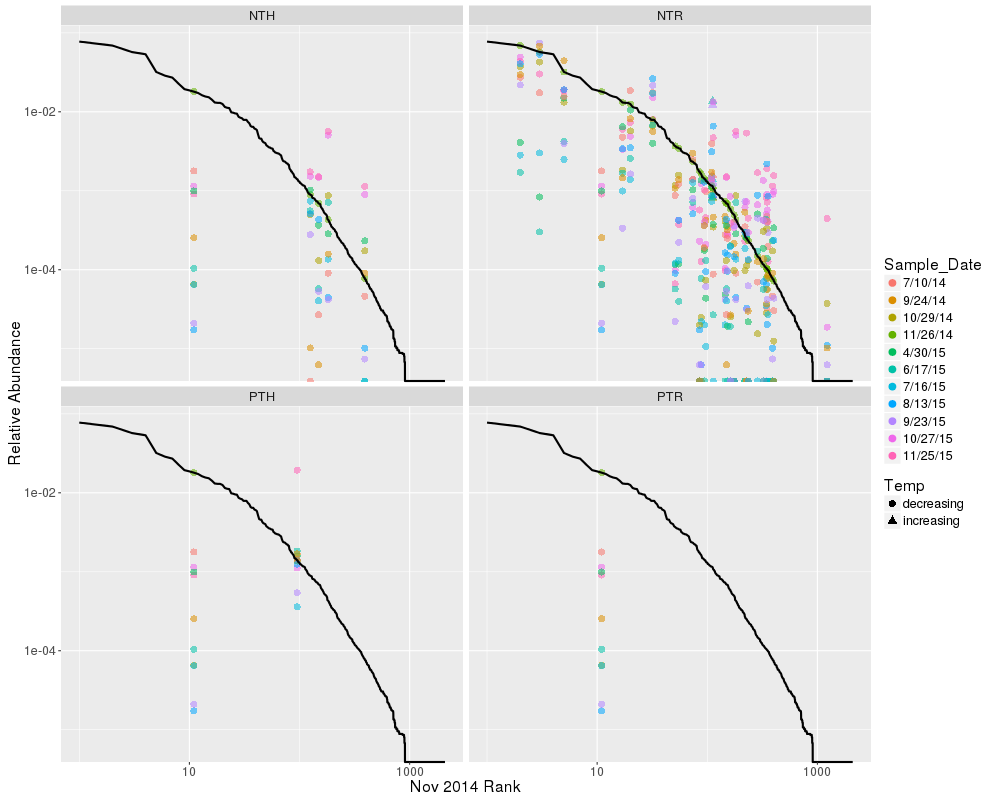

In [143]:
%%R -w 1000 -h 800
getPalette = colorRampPalette(brewer.pal(5, "Dark2"))

mdf.byday.Nov$Sample_Date = factor(mdf.byday.Nov$Sample_Date, 
                                        levels = c('7/10/14', '9/24/14', '10/29/14', '11/26/14', 
                                                  '4/30/15', '6/17/15', '7/16/15', '8/13/15', 
                                                  '9/23/15', '10/27/15', '11/25/15'))

d$Sample_Date = factor(d$Sample_Date, levels = c('7/10/14', '9/24/14', '10/29/14', '11/26/14', 
                                                  '4/30/15', '6/17/15', '7/16/15', '8/13/15', 
                                                  '9/23/15', '10/27/15', '11/25/15'))


#p = p + geom_vline(data = d.RNA, aes(xintercept = Rank), color = "#377eb8", alpha = 0.25, size = 1)
#p = p + geom_vline(data = d.DNA, aes(xintercept = Rank), color = "#4daf4a", alpha = 0.25, size = 1)

p = ggplot(data = mdf.byday.Nov, aes(x = Rank, y = mean_day_abundance))# + 
           # geom_line(alpha = 0.5, size = 0.5) 

p = p + geom_point(data = d.Temp, aes(fill = Sample_Date, color = Sample_Date, shape = Temp, alpha = 0.6),
                                 size = 3)
#p = p + geom_rug(data = d.DNA, color = "blue", sides = "t", size = 1.25)

p = p + geom_line(data = subset(mdf.byday.Nov, Sample_Date == '11/26/14'), 
                  size = 1)

p = p +  scale_shape_manual(values = c(16,17))


p = p + scale_y_log10()

p = p + scale_x_log10()

p = p  + theme(text = element_text(size=16))

p = p + labs(x = "Nov 2014 Rank", y = "Relative Abundance", size = "Sample Date") +
       guides(fill= guide_legend(override.aes = list(size=3))) + facet_wrap(~Land_Management) +
        guides(alpha = FALSE)

p


In [94]:
%%R
ggsave(filename = "data/figs/Temp_RA.png", plot = p, width =10, height =8)

In [145]:
%%R
d.Temp %>% group_by(OTU, Rank2, Rank3, Rank6, Rank7) %>% 
    mutate(minab = min(mean_day_abundance)) %>% filter(Sample_Date %in% c('11/26/14', '4/30/15')) %>% 
    group_by(OTU, Rank2, Rank3, Rank6,Sample_Date, Rank7) %>% mutate(ratio = (mean_day_abundance/minab)) %>% ungroup()%>%
    select(OTU, Rank2, Rank6, Sample_Date, ratio, Rank7) %>% as.data.frame


         OTU            Rank2             Rank6 Sample_Date       ratio
1   OTU.1851    p__Ascomycota              <NA>    11/26/14         Inf
2   OTU.1851    p__Ascomycota              <NA>     4/30/15         Inf
3    OTU.692    p__Ascomycota  g__Hymenoscyphus    11/26/14   10.277328
4    OTU.692    p__Ascomycota  g__Hymenoscyphus     4/30/15    6.801055
5    OTU.549 p__Basidiomycota   g__unidentified    11/26/14 1040.770619
6    OTU.549 p__Basidiomycota   g__unidentified     4/30/15   57.518272
7   OTU.1297    p__Ascomycota   g__unidentified    11/26/14         Inf
8   OTU.1297    p__Ascomycota   g__unidentified     4/30/15         Inf
9   OTU.1177 p__Basidiomycota      g__Dioszegia    11/26/14  111.093772
10  OTU.1177 p__Basidiomycota      g__Dioszegia     4/30/15   58.520729
11   OTU.169    p__Ascomycota   g__unidentified    11/26/14         Inf
12   OTU.169    p__Ascomycota   g__unidentified     4/30/15         NaN
13   OTU.657             <NA>              <NA>    11/26/14     